In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [2]:
train_set_1_path = 'Training_set_1.csv'
train_set_2_path = 'Training_set_2.csv'
test_set_path = 'BATADAL_test_dataset.csv'

train_set_1 = pd.read_csv(train_set_1_path)
train_set_2 = pd.read_csv(train_set_2_path)
test_set = pd.read_csv(test_set_path)

train_set_1.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [2]:
train_set_2.columns = train_set_2.columns.str.strip()
train_set_2['ATT_FLAG'].unique()

array([-999,    1], dtype=int64)

In [3]:
train_set_2['ATT_FLAG'] = train_set_2['ATT_FLAG'].replace(-999, 1)
train_set_1['ATT_FLAG'] = 0  # All entries in Training Set 1 are normal
combined_train_set = pd.concat([train_set_1, train_set_2])

features = combined_train_set.drop(['DATETIME', 'ATT_FLAG'], axis=1)
labels = combined_train_set['ATT_FLAG']

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

pd.DataFrame(features_normalized, columns=features.columns).head(), labels.head()

(       L_T1      L_T2      L_T3      L_T4      L_T5      L_T6      L_T7  \
 0 -1.806526 -0.842324 -1.488987 -1.425445 -0.125348 -0.298388 -2.100172   
 1 -1.887142 -0.869505 -0.824496 -1.353330  0.514240  0.704678 -1.751885   
 2 -1.963873 -0.885146 -0.091989 -0.568133  1.123796  0.733665 -1.278142   
 3 -1.953279 -0.869415  0.693010  0.332893  1.637563  0.733665 -0.127157   
 4 -1.828296 -0.815065  1.523894  1.561245  1.028700  0.733665  1.358859   
 
       F_PU1  S_PU1     F_PU2  ...    P_J300    P_J256    P_J289    P_J415  \
 0 -0.188017    0.0  0.700636  ... -0.487357  0.968263 -0.469379  0.198277   
 1 -0.178371    0.0  0.702945  ... -0.488643  1.185917 -0.472416  0.423275   
 2 -0.245178    0.0  0.686953  ... -0.486892  1.375836 -0.472402  0.513938   
 3 -0.328896    0.0  0.666913  ... -0.453324  1.557541 -0.439961  0.705004   
 4 -0.351079    0.0  0.661603  ... -0.398116  1.779468 -0.385812  1.024128   
 
      P_J302    P_J306    P_J307    P_J317     P_J14    P_J422  
 0 -1.2

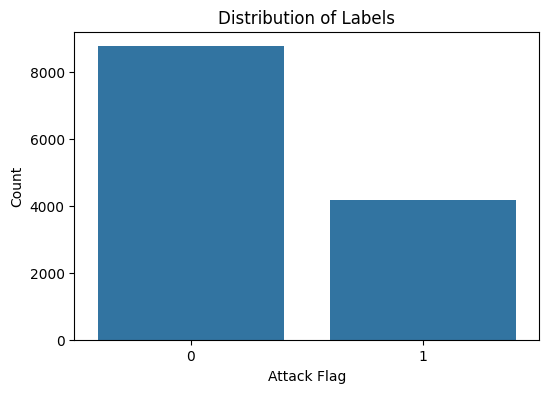

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=labels)
plt.title('Distribution of Labels')
plt.xlabel('Attack Flag')
plt.ylabel('Count')
plt.show()

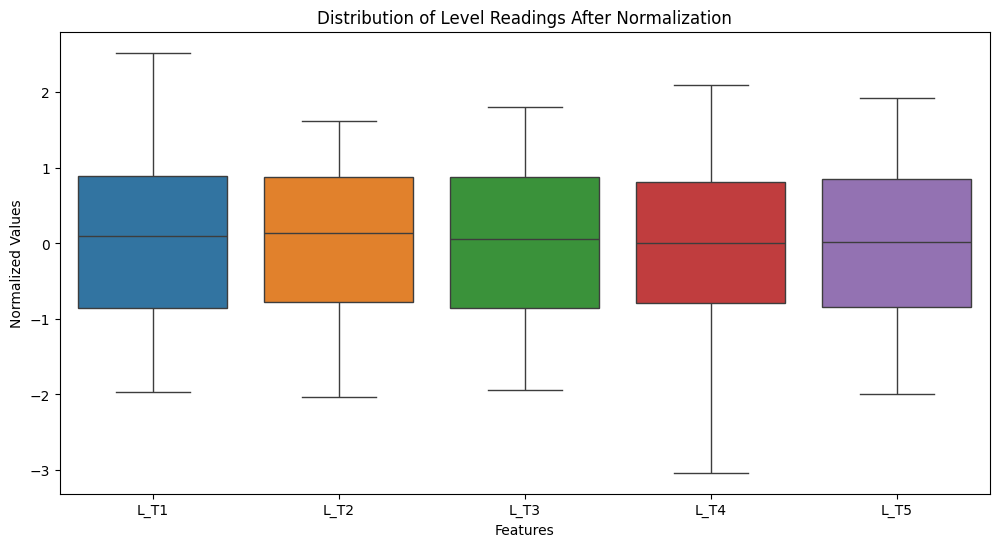

In [6]:
features_df = pd.DataFrame(features_normalized, columns=features.columns)
plt.figure(figsize=(12, 6))
sns.boxplot(data=features_df[['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5']])
plt.title('Distribution of Level Readings After Normalization')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()

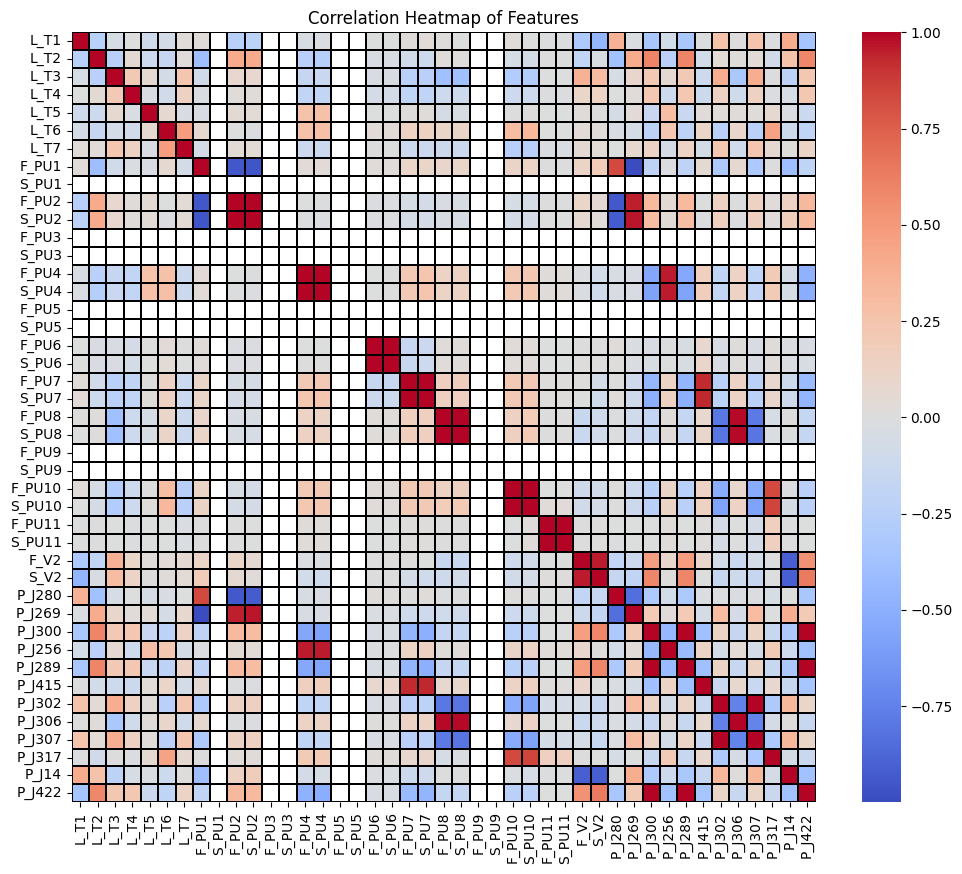

In [7]:
corr_matrix = features_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1, linecolor='black', fmt=".1f", annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

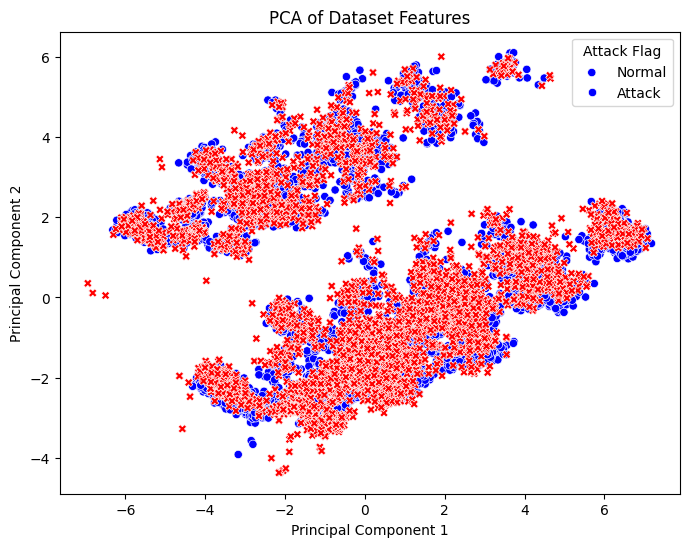

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, labels.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['PC1'], y=final_df['PC2'], hue=final_df['ATT_FLAG'], style=final_df['ATT_FLAG'], palette=['blue', 'red'])
plt.title('PCA of Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Flag', labels=['Normal', 'Attack'])
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.3, random_state=42)

In [20]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

checkpoint = ModelCheckpoint("model.keras", save_best_only=True, verbose=1, monitor='val_loss')
    
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1,callbacks=[checkpoint])

Epoch 1/50
 96/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 0.7425
Epoch 1: val_loss improved from inf to 0.61921, saving model to model.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5903 - loss: 0.7370 - val_accuracy: 0.6893 - val_loss: 0.6192
Epoch 2/50
 76/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.6664
Epoch 2: val_loss improved from 0.61921 to 0.61641, saving model to model.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 0.6625 - val_accuracy: 0.6898 - val_loss: 0.6164
Epoch 3/50
 92/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6607 - loss: 0.6466
Epoch 3: val_loss improved from 0.61641 to 0.61251, saving model to model.keras
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6613 - loss: 0.6458 - val_accuracy: 0.6898 - val_loss: 0.6125
Epoch 4/50
 92/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6697 - loss: 0.6350
Epoch 4: val_loss improved from 0.61251 to 0.61054, saving model to m

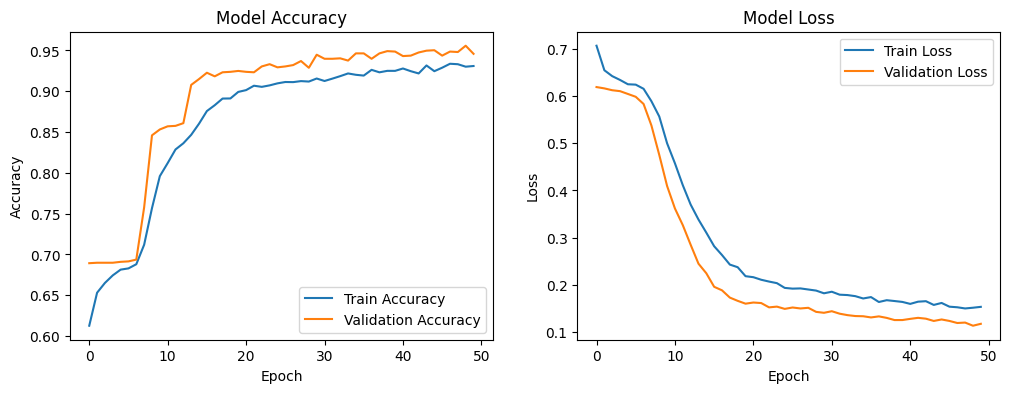

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


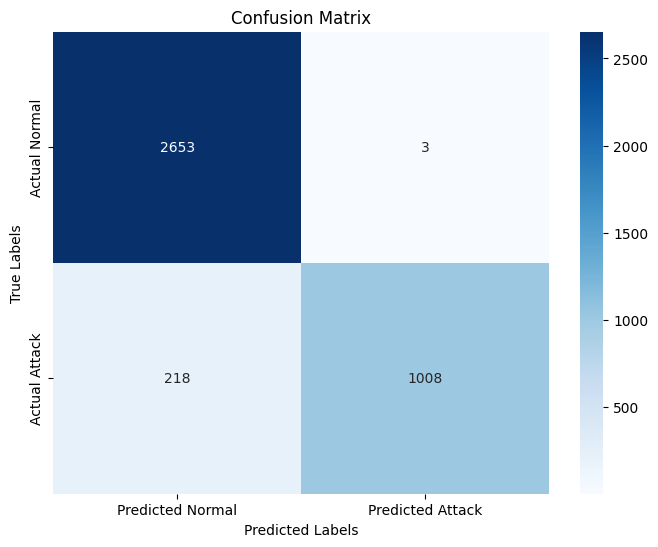

(              precision    recall  f1-score      support
 Normal         0.924068  0.998870  0.960014  2656.000000
 Attack         0.997033  0.822186  0.901207  1226.000000
 accuracy       0.943071  0.943071  0.943071     0.943071
 macro avg      0.960550  0.910528  0.930611  3882.000000
 weighted avg   0.947112  0.943071  0.941442  3882.000000,
 0.9430705821741371)

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) 

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Normal', 'Actual Attack'], columns=['Predicted Normal', 'Predicted Attack'])

class_report = classification_report(y_test, y_pred, target_names=['Normal', 'Attack'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report_df, accuracy